In [3]:
# import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import functools
import random

In [4]:
pair = np.array([1, -1], dtype='int8')  # a closed-open space pair. 1 is the closed space, -1 is the open space.
grid = np.zeros((20, 20), dtype='int8')

print(pair)
print(grid)

[ 1 -1]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### The Beady Ring

The sample architectural problem is build upon a 20x20 grid. In this grid, pairs are placed, which are a closed and an open space. 

The rules for placing pairs is:

    1. must be placed so that the open space is adjacent to one other already placed open space
    2. closed cell can only be joined to another closed cell at the vertex, not at the edges.


In [45]:
def within_bounds(index, size):
    return index[0] < size[0] and index[1] < size[1]


def adjacent(space):
    return [space + np.array(adj) for adj in [[-1, 0], [0, 1], [1, 0], [0, -1]]]


def check_orientation(space, grid):
    return all([grid[tuple(space)] != 1 for s in adjacent(np.array(space)) if within_bounds(s, (20, 20))])


def find_orientations(space, grid):
    return [o for o in [[-1, 0], [0, 1], [1, 0], [0, -1]] if check_orientation(np.array(space) + o, grid)]

 
def generate_options(grid):
    spaces = np.argwhere(grid == -1) 
    options = []

    for space in spaces:
        # -- get available indices around every space
        available_spaces = [tuple(i) for i in adjacent(space) if within_bounds(tuple(i), (20, 20)) and grid[tuple(i)] == 0]
        available_orientations = [find_orientations(s, grid) for s in available_spaces]

        print(available_spaces, available_orientations)
        
        options += [tuple(x) for x in zip(available_spaces, available_orientations)]
    
    return options


def update_grid(grid, center, orientatation):
    new_grid = grid
    
    clsd_location = np.array(center) + np.array(orientation)

    print('locations:', open_location, clsd_location)
    new_grid[tuple(center)] = -1
    new_grid[tuple(clsd_location[0])] = 1
    return grid
    # return new_grid



grid = np.zeros((20, 20), dtype='int8')
orientations = [[-1, 0], [0, 1], [1, 0], [0, -1]]  # top, right, bottom, left

start_open = np.array([np.random.randint(0, 20), np.random.randint(0, 20)])
start_clsd = start_open + np.array(orientations[np.random.randint(0, 4)])

# -- start with one random location

grid[tuple(start_open)], grid[tuple(start_clsd)] = -1, 1

# -- find next avaible spaces, the 'zero'-spaces around a 'minus-one'-spaces

print(grid)

for i in range(10):
    options = generate_options(grid)

    if len(options) > 0:
        center, orientation = options[random.randint(0, len(options) - 1)]
        grid = update_grid(grid, center, orientation)

    

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

IndexError: index 20 is out of bounds for axis 1 with size 20

In [4]:
def adjacent(space):
    return np.array([space + adj for adj in [[-1, 0], [0, 1], [1, 0], [0, -1]]])


def wrap_around(i, size):
    return i % size


def get_subgrid(grid, origin, size=(7, 7)):
    x_size, y_size = grid.shape
    x_origin, y_origin = origin

    x_offset = int(size[0] / 2 if size[0] % 2 == 0 else (size[0] - 1) / 2)
    y_offset = int(size[1] / 2 if size[1] % 2 == 0 else (size[1] - 1) / 2)
    
    x_indices = wrap_around(np.arange(x_origin - x_offset - 1, x_origin + x_offset, dtype='int8'), x_size)
    y_indices = wrap_around(np.arange(y_origin - y_offset - 1, y_origin + y_offset, dtype='int8'), y_size)
    
    subgrid = np.zeros(size, dtype='int8')
    index_grid = np.zeros((size[0], size[1], 2), dtype='int8')

    for i, x in enumerate(x_indices):
        for j, y in enumerate(y_indices):
            subgrid[i, j] = grid[x, y]
            index_grid[i, j] = np.array([x, y])

    return subgrid, index_grid


def get_new_grid(grid, center, orientation):
    # compute open and closed cell locations
    o, c = center, center + orientation

     # wrap around the grid
    c[0] = wrap_around(c[0], grid.shape[0])
    c[1] = wrap_around(c[1], grid.shape[1])
   
    # apply cell values
    grid[tuple(o)] = -1
    grid[tuple(c)] = 1
    
    return grid


def check_orientation(grid, space):
    return grid[tuple(wrap_around(space, grid.shape[0]))] == 0

def find_orientations(grid, center, orientations):
    """This function check every possible orientation and checks if it has not been build yet."""
    return [orientation for orientation in orientations if check_orientation(grid, center + orientation)]

The generate dataset contains 183 samples.
Dark purple spaces are open, green is empty, yellow is closed


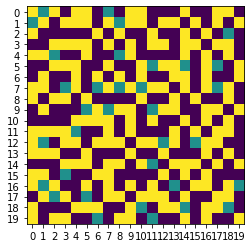

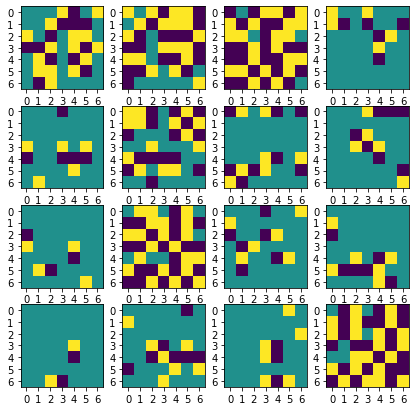

In [137]:
# the goal is to build two datasets of row and random aggregation samples of 7x7
# the samples will then be fed to a svm for classification
dataset = []

# INITIALIZATION

# -- constants
AGGREGATION = "random"
GRID_SIZE = 20
ORIENTATIONS = [[-1, 0], [0, 1], [1, 0], [0, -1]]

# -- initialize empty grid
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype="int8")

# -- start with a random location.
start_center = np.random.randint(0, GRID_SIZE, size=2)
start_orientation = np.random.permutation(ORIENTATIONS)[0]

# -- apply start location
grid = get_new_grid(grid, start_center, start_orientation)

# -- Save a copy of the subgrid for the dataset
subgrid, index_grid = get_subgrid(grid, start_center)
dataset.append(subgrid)


# INTERATION, RANDOM AGGREGATION

STEPS = 200

for i in range(STEPS):
    # -- find available positions in the 7x7 subgrid
    available_locations = np.argwhere(grid == 0)
    available_orientations = np.array([find_orientations(grid, location, ORIENTATIONS) for location in available_locations])

    # -- shuffle, both sets with the same permutation
    p = np.random.permutation(np.arange(len(available_locations)))
    available_locations = available_locations[p]
    available_orientations = available_orientations[p]

    # -- start adding blocks
    for location, orientations in zip(available_locations, available_orientations):
        # -- check if there are any available orientations
        if len(orientations) > 0:
            # -- update the grid with the first orientation from the permuted orientations list
            orientation = np.random.permutation(orientations)[0]
            grid = get_new_grid(grid, location, orientation)
            
            # -- get the subgrid and index_grid, add to the dataset.
            subgrid, index_grid = get_subgrid(grid, location)
            dataset.append(subgrid)
            break
    
    
print(f"The generate dataset contains {len(dataset)} samples.")
print('Dark purple spaces are open, green is empty, yellow is closed')

plt.imshow(grid)
plt.gca().set_xticks(np.arange(0, GRID_SIZE))
plt.gca().set_yticks(np.arange(0, GRID_SIZE))

permuted_dataset = np.random.permutation(dataset)
fig, axs = plt.subplots(4, 4, figsize=(7,7))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(permuted_dataset[i])
    ax.set_xticks(np.arange(0, 7))
    ax.set_yticks(np.arange(0, 7))

The rules are not so well defined. This random aggegation is just completly random and is incorrect. As Hanna's version produce public and private spaces. In the current situation these are mixed.

I tried it using selecting only from the subgrid only, but this seem to lead nowhere. Next I'm trying selecting only the options next to an open space, that has been built.

Hanna notes for both ideals:

"The first is a strict arrangement of straight rows rather like highly planned settlements such as Manhattan, and the second is a completely random arrangement of units joined open cell to open cell."

Another thing is that I think I should either record every possible option, or run it multiple times, because at best I can only get around ~185 samples. And Hanna notes that he used 450 samples for each culture.

173


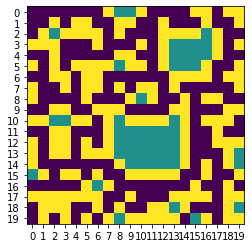

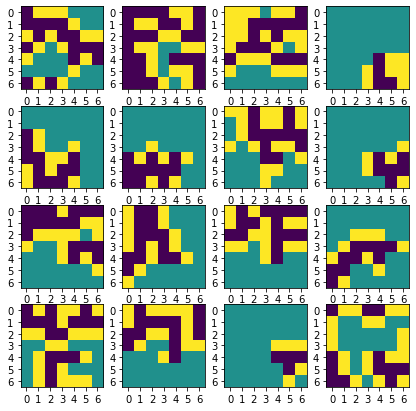

In [29]:
# the goal is to build two datasets of row and random aggregation samples of 7x7
# the samples will then be fed to a svm for classification
x_random = []

# INITIALIZATION

# -- constants
AGGREGATION = "random"
GRID_SIZE = 20
ORIENTATIONS = [[-1, 0], [0, 1], [1, 0], [0, -1]]

# -- initialize empty grid
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype="int8")

# -- start with a random location.
start_center = np.random.randint(0, GRID_SIZE, size=2)
start_orientation = np.random.permutation(ORIENTATIONS)[0]

# -- apply start location
grid = get_new_grid(grid, start_center, start_orientation)

# -- Save a copy of the subgrid for the dataset
subgrid, index_grid = get_subgrid(grid, start_center)
dataset.append(subgrid)

# INTERATION, RANDOM AGGREGATION

def flatten(a):
    """Flatten a n dimensional array into a n-1 dimensional array."""
    return a.reshape(-1, a.shape[-1])


def lookup(grid, location):
    """Helper function to look up a value in a given grid. Takes an array with an x and y coordinate."""
    return grid[tuple(location)]


def find_spaces(grid, value):
    """Helper function to find indices of a specific value."""
    return np.argwhere(grid == value)


def adjacent(space):
    """Calculates the indices of the adjacent spaces"""
    return np.array([space + np.array(adj) for adj in [[-1, 0], [0, 1], [1, 0], [0, -1]]]).reshape(4, 2)


def find_adjacent(spaces, grid_size):
    """For a list of spaces, find all adjacent, and wrap around the grid."""
    return np.array([wrap_around(adjacent(space), grid_size) for space in spaces])


def check_availability(spaces, grid):
    return np.array([space for space in spaces if lookup(grid, space) == 0])


STEPS = 500

for i in range(STEPS):
    # 1. find space which contain an 'open' cell, those with value '-1' in the subgrid
    open_spaces = find_spaces(grid, -1)

    # 2. get the indices which correspond with the global grid.
    # open_spaces_indices = [lookup(grid, space) for space in open_spaces]

    # 3. find all adjacent spaces, for each 'open' cell, and wrap around if need be
    adjacent_spaces = flatten(find_adjacent(open_spaces, GRID_SIZE))

    # 4. check if they are empty or have the value '0'
    available_positions = check_availability(adjacent_spaces, grid)

    # 5. calculate indices for the orientations
    orientations_per_position = find_adjacent(available_positions, GRID_SIZE)
    
    # 6. calculate which orientations are available, have a value of '0'
    available_orientations = np.array([check_availability(o, grid) for o in orientations_per_position])

    # 7. pick on position, orientation
    for position, orientations in zip(available_positions, available_orientations):    
        if len(orientations) > 0:
            orientation = np.random.permutation(orientations)[0]
            
            # 8. apply to grid
            grid[tuple(position)] = -1
            grid[tuple(orientation)] = 1
            
            # 9. get new sub and index grid, and add to dataset.        
            subgrid, index_grid = get_subgrid(grid, position)
            x_random.append(subgrid)
            break
    
plt.imshow(grid)
plt.gca().set_xticks(np.arange(0, GRID_SIZE))
plt.gca().set_yticks(np.arange(0, GRID_SIZE))

permuted_dataset = np.random.permutation(x_random)
fig, axs = plt.subplots(4, 4, figsize=(7,7))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(permuted_dataset[i])
    ax.set_xticks(np.arange(0, 7))
    ax.set_yticks(np.arange(0, 7))

print(len(x_random))

178


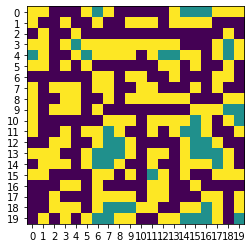

In [40]:
x_row = []

# INITIALIZATION

# -- constants
AGGREGATION = "row"
GRID_SIZE = 20
ORIENTATIONS = [[0, -1], [0, 1]] # , [-1, 0], [1, 0]

# -- initialize empty grid
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype="int8")

# -- start with a random location.
start_center = np.random.randint(0, GRID_SIZE, size=2)
start_orientation = np.random.permutation(ORIENTATIONS)[0]

# -- apply start location
grid = get_new_grid(grid, start_center, start_orientation)

# -- Save a copy of the subgrid for the dataset
subgrid, index_grid = get_subgrid(grid, start_center)
dataset.append(subgrid)

# INTERATION, RANDOM AGGREGATION

def flatten(a):
    """Flatten a n dimensional array into a n-1 dimensional array."""
    return a.reshape(-1, a.shape[-1])


def lookup(grid, location):
    """Helper function to look up a value in a given grid. Takes an array with an x and y coordinate."""
    return grid[tuple(location)]


def find_spaces(grid, value):
    """Helper function to find indices of a specific value."""
    return np.argwhere(grid == value)


def adjacent(space):
    """Calculates the indices of the adjacent spaces"""
    return np.array([space + np.array(adj) for adj in [[-1, 0], [1, 0], [0, -1], [0, 1]]]).reshape(4, 2)


def find_adjacent(spaces, grid_size):
    """For a list of spaces, find all adjacent, and wrap around the grid."""
    return np.array([wrap_around(adjacent(space), grid_size) for space in spaces])


def check_availability(spaces, grid):
    return np.array([space for space in spaces if lookup(grid, space) == 0])


STEPS = 500

for i in range(STEPS):
    # 1. find space which contain an 'open' cell, those with value '-1' in the subgrid
    open_spaces = find_spaces(grid, -1)

    # 2. get the indices which correspond with the global grid.
    # open_spaces_indices = [lookup(grid, space) for space in open_spaces]

    # 3. find all adjacent spaces, for each 'open' cell, and wrap around if need be
    adjacent_spaces = flatten(find_adjacent(open_spaces, GRID_SIZE))

    # 4. check if they are empty or have the value '0'
    available_positions = check_availability(adjacent_spaces, grid)

    # 5. calculate indices for the orientations
    orientations_per_position = find_adjacent(available_positions, GRID_SIZE)
    
    # 6. calculate which orientations are available, have a value of '0'
    available_orientations = np.array([check_availability(o, grid) for o in orientations_per_position])

    # 7. pick on position, orientation
    for position, orientations in zip(available_positions, available_orientations):    
        if len(orientations) > 0:
            orientation = np.random.permutation(orientations)[0]
            
            # 8. apply to grid
            grid[tuple(position)] = -1
            grid[tuple(orientation)] = 1
            
            # 9. get new sub and index grid, and add to dataset.        
            subgrid, index_grid = get_subgrid(grid, position)
            x_row.append(subgrid)
            break
    
plt.imshow(grid)
plt.gca().set_xticks(np.arange(0, GRID_SIZE))
plt.gca().set_yticks(np.arange(0, GRID_SIZE))

# permuted_dataset = np.random.permutation(x_row)
# fig, axs = plt.subplots(4, 4, figsize=(7,7))

# for i, ax in enumerate(axs.flatten()):
#     ax.imshow(permuted_dataset[i])
#     ax.set_xticks(np.arange(0, 7))
#     ax.set_yticks(np.arange(0, 7))

print(len(x_row))